<a href="https://colab.research.google.com/github/RogerHeederer/NLP_entry/blob/master/Softmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Reference Source : wikidocs.net 유영준님 자료

스스로 학습하면서 필요한 부분에는 추가적 설명, 소스 코드 삽입 및 수정 등이 있습니다. 영리적 목적이 아닌, 자기 계발 목적으로 정리한 자료입니다.

In [4]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [31]:
import pandas as pd
data = pd.read_csv("/gdrive/My Drive/RogerHeederer/NLP_entry/data/iris.csv",
                  names = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Species"])

In [32]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [33]:
print("품종 종류:", data["Species"].unique(), sep="\n")

품종 종류:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


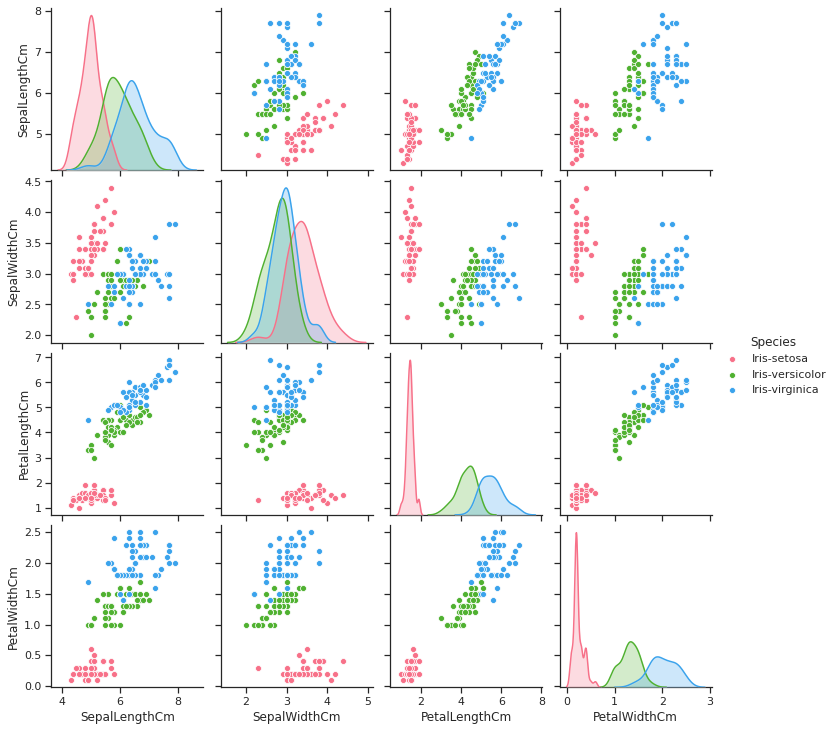

In [34]:
# 4개의 features로 3개의 품종으로 분류하는 문제
import seaborn as sns
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data, hue="Species", palette="husl")

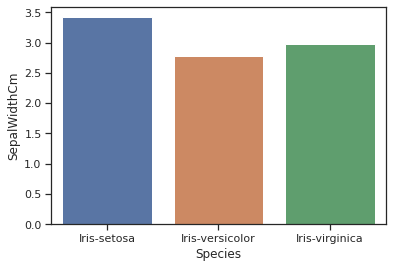

In [35]:
sns.barplot(data['Species'], data['SepalWidthCm'], ci=None) # SepalWidthCm의 특성에 대한 각 종의 관걔

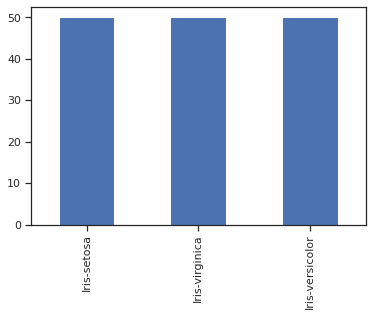

In [36]:
#150개의 샘플 중 각 품종이 몇개씩 있는지 보기
import matplotlib.pyplot as plt
data['Species'].value_counts().plot(kind='bar')

**소프트맥스 회귀 모델 넣기 전에 데이터 전처리**

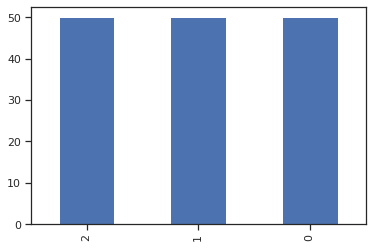

In [37]:
#원핫인코딩 전에 정수인코딩 먼저 해줌
data['Species'] = data['Species'].replace(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor'],[0,1,2])
data['Species'].value_counts().plot(kind='bar')

In [38]:
from sklearn.model_selection import train_test_split
#레이블 값과 피쳐값들 분리
data_X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
data_y = data['Species'].values

print(data_X[:5])
print(data_y[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[1 1 1 1 1]


In [39]:
(X_train, X_test, y_train, y_test) = train_test_split(data_X, data_y, train_size=0.8, random_state=1)

#원핫인코딩
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[:5])
print(y_test[:5])

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


**소프트맥스 회귀**

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

model=Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))
sgd=optimizers.SGD(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X_train,y_train, batch_size=1, epochs=200, validation_data=(X_test, y_test))
#validation_data=(X_test, y_test) 이건 각 epoch마다 훈련된 상태의 모델을 테스트 데이터에 적용시켜보는 거다
# 실제 훈련에는 반영되지 않고, 당연히 가중치 업데이트에 해당 데이터는 영향을 주지 않는다. 베타 테스트 잠깐하는 느낌

Epoch 1/200
120/120 [==============================] - 0s 2ms/step - loss: 6.1620 - accuracy: 0.3083 - val_loss: 4.4701 - val_accuracy: 0.4333
Epoch 2/200
120/120 [==============================] - 0s 985us/step - loss: 4.9719 - accuracy: 0.3083 - val_loss: 3.7504 - val_accuracy: 0.4333
Epoch 3/200
120/120 [==============================] - 0s 987us/step - loss: 4.0076 - accuracy: 0.3083 - val_loss: 3.1462 - val_accuracy: 0.4333
Epoch 4/200
120/120 [==============================] - 0s 942us/step - loss: 3.2031 - accuracy: 0.3083 - val_loss: 2.6957 - val_accuracy: 0.4333
Epoch 5/200
120/120 [==============================] - 0s 1ms/step - loss: 2.6455 - accuracy: 0.3000 - val_loss: 2.4537 - val_accuracy: 0.4000
Epoch 6/200
120/120 [==============================] - 0s 969us/step - loss: 2.3789 - accuracy: 0.2083 - val_loss: 2.3399 - val_accuracy: 0.2667
Epoch 7/200
120/120 [==============================] - 0s 945us/step - loss: 2.2169 - accuracy: 0.1750 - val_loss: 2.2482 - val_accura

In [41]:
#acc는 훈련데이터에 대한 정확도, val_acc는 테스트 데이터에 대한 정확도를 의미

In [44]:
history.history['accuracy'][1:5]

[0.3083333373069763,
 0.3083333373069763,
 0.3083333373069763,
 0.30000001192092896]

In [52]:
history.history['loss'][1:5], history.history['val_loss'][1:5]

([4.971914291381836,
  4.0075812339782715,
  3.2030789852142334,
  2.645521640777588],
 [3.7504420280456543,
  3.1462337970733643,
  2.6957266330718994,
  2.453728437423706])

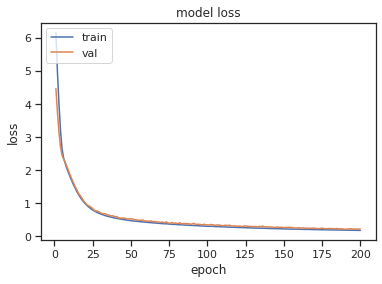

In [45]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [46]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 1ms/step - loss: 0.2241 - accuracy: 0.9333


[0.2241373062133789, 0.9333333373069763]

In [49]:
model.evaluate(X_test, y_test)[0]

1/1 [==============================] - 0s 1ms/step - loss: 0.2241 - accuracy: 0.9333


0.2241373062133789

In [50]:
model.evaluate(X_test, y_test)[1]

1/1 [==============================] - 0s 2ms/step - loss: 0.2241 - accuracy: 0.9333


0.9333333373069763